# Homework 3 #

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.neural_network import MLPRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import plotly.graph_objects as go


dataset_path = "../../datasets/parkinsons.csv"

df = pd.read_csv(dataset_path)

## Exercice 5

In [4]:
X = df.drop(columns=['target'])
y = df['target']

def linearRegression(X, y, i):
    # split the data with 80% in training and 20% in testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # create the model
    model = LinearRegression()

    # train the model
    model.fit(X_train, y_train)

    # test the model using mae as loss function
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    return mae

def mlp_no_act(X, y, i):
     # split the data with 80% in training and 20% in testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Create the Model
    mlp_no_act = MLPRegressor(hidden_layer_sizes = (10, 10), activation = 'identity', random_state = 0, max_iter=1000)
    # Train the Model
    mlp_no_act.fit(X_train, y_train)

    # Test the Model usin MAE as loss function
    y_pred = mlp_no_act.predict(X_test)
    mae_mlp_no_act = mean_absolute_error(y_test, y_pred)

    return mae_mlp_no_act  

def mlp_relu(X, y, i):
    # split the data with 80% in training and 20% in testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    mlp_relu = MLPRegressor(hidden_layer_sizes = (10, 10), activation = 'relu', random_state = 0, max_iter=1000)
    mlp_relu.fit(X_train, y_train)

    y_pred = mlp_relu.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    return mae

    


In [5]:
mlp_relu_avg = []
mlp_no_act_avg = []
linearRegression_avg = []
for i in range(1, 11):
    mlp_relu_avg.append(mlp_relu(X, y, i))
    mlp_no_act_avg.append(mlp_no_act(X, y, i))
    linearRegression_avg.append(linearRegression(X, y, i))

linreg_avg = np.mean(linearRegression_avg)
mlpnoact_avg = np.mean(mlp_no_act_avg)
mlprelu_avg = np.mean(mlp_relu_avg)

columns = ['Linear Regression', 'MLP no Act', 'MLP RELU']
averages = np.array([linreg_avg, mlpnoact_avg, mlprelu_avg]).reshape(1, -1) 
stats_df = pd.DataFrame(averages, columns = columns,  index = ['MAE'])
display(stats_df)

#print("MLP RELU: ", np.mean(mlp_relu_avg))
#print("MLP NO ACT: ", np.mean(mlp_no_act_avg))
#print("Linear Regression: ", np.mean(linearRegression_avg))

,Linear Regression,MLP no Act,MLP RELU
MAE,8.084054,8.091273,4.621453


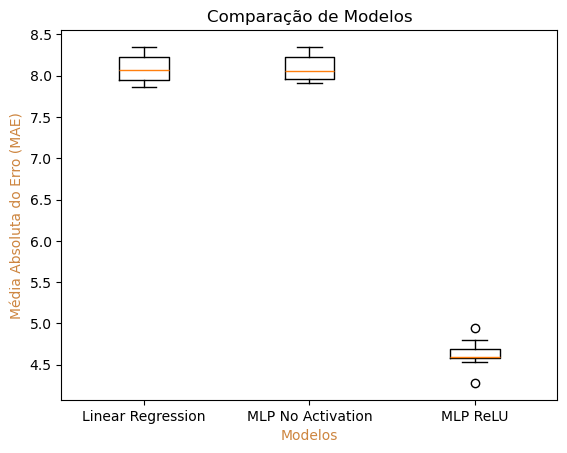

In [6]:
# Os teus dados
data = [linearRegression_avg, mlp_no_act_avg, mlp_relu_avg]
model_names = ['Linear Regression', 'MLP No Activation', 'MLP ReLU']

# Criar o boxplot
plt.boxplot(data)

# Adicionar os nomes dos modelos ao eixo X
plt.xticks([1, 2, 3], model_names)  # Índices começam em 1 para plt.boxplot

# Melhorar a legibilidade
plt.xlabel('Modelos', color = 'peru')
plt.ylabel('Média Absoluta do Erro (MAE)', color = 'peru')
plt.title('Comparação de Modelos')

# Mostrar o gráfico
plt.show()



## Exercise 6

A linear regressor can be modeled by the expression: $$ \hat{y} = Wx^T + b $$ This model aims to minimize a certain loss function, an error measure between the predicted and the real outputs, by ajusting the values of W, the weights. Since this model is linear, it assumes a linear relationship between the input variables and the output. This assumption is evidently a weak point to this model limiting graetly its generalization ability, being unable to identify non-linear relationships within the training data, wich means that, for datasets which contain these kinds of relationships or that are more complex, the model will struggle to perform well. 

When it comes to the MLP, each neuron applies a linear transformation followed by an activation function. On a normal MLP, the data is treated the following way: $$ z^{(1)} = W^{(1)}x^{(0)} + b^{(1)}. $$ ($x^0$ is the input). Then the activation function follows: $$ Φ^{(1)}(z^{(1)}) = x^{(1)}, $$ where $Φ$ represents the activation function. Then the preocess repeats: $$ z^{(2)} = W^{(2)}x^{(1)} + b^{(2)} \Rightarrow Φ^{(2)}(z^{(2)}) = x^{(2)}, $$ and again... $$ z^{(3)} = W^{(3)}x^{(2)} + b^{(3)} \Rightarrow Φ^{(3)}(z^{(3)}) = x^{(3)} = \hat{y}, $$ where $x^{(3)}=\hat{y}$ is the output. 

When there is no activation function, the neurons on the MLP only perform consecutive linear transformations on the data. The composition of the different linear transformations result in a single linear transformation, wich means that in the end, the MLP will behave similarly to a linear regressor: $$ \hat{y} = W^{(3)}(W^{(2)}(W^{(1)}x + b^{(1)}) + b^{(2)}) + b^{(3)} \Rightarrow$$ $$ \Rightarrow \hat{y} = W_{eq} x + b_{eq}, $$ where $$ W_{eq} = W^{(1)}W^{(2)}W^{(3)} \ \ \ and \ \ \  b_{eq} = b^{(3)} + W^{(3)}b^{(2)} + W{(3)}W{(2)}b^{(1)}. $$ Hence, mathematicaly, an MLP without an activation function is nothing but a linear regressor that applies multiple linear transformations instead of just the one. 

This fact is clearly supported by the fact that these models performed equally on the last problem, as illustrated by the boxplots above. The small diference between the MAE of one and the other can be explained by the multiple linear transformations of the MLP opposed by the unique of the linear regressor. 

As mentioned above, the assumption of linearity within the data results in a weaker model that will struggle with more complex data that presents non-linear relationships. Therefore, if an activation function is implemented in the MLP, this problem will be overcome, since the regressor will be able to detect the non-linear relations wich are common in most "real world" problems. 

## Why ReLU activation function? ##


__Sigmoid__ and __tanh__ activation functions share two common problems: __vanishing gradients__ and __oversaturation__. These issues arise because, as the input approaches the function's limits (0 and 1 for sigmoid, and -1 and 1 for tanh), the gradient approaches zero. As shown in their respective plots, this makes the updates to the weights during backpropagation smaller and smaller, __which can stall the learning process__, especially in deeper networks. This is known as the vanishing gradient problem.

In contrast, the ReLU (Rectified Linear Unit) activation function does not suffer from this issue for positive inputs. For $x>0$ , ReLU is linear, meaning its gradient remains constant (equal to 1), allowing gradients to flow through the network effectively, avoiding stagnation.

Another advantage of ReLU is its inherent __sparsity__, something sigmoid and tanh lack. Sparsity occurs because ReLU outputs zero for negative inputs. This means that only a fraction of neurons are activated during forward propagation, as neurons with negative inputs are "turned off" by ReLU. This selective activation can act as a form of regularization, preventing overfitting by ensuring that only relevant neurons contribute to the model's output.

Though a neuron may be inactive during forward propagation, it can still be reactivated during backpropagation if its gradient is non-zero. This sparsity also makes ReLU computationally efficient and helps the model focus on learning more critical patterns in the data.

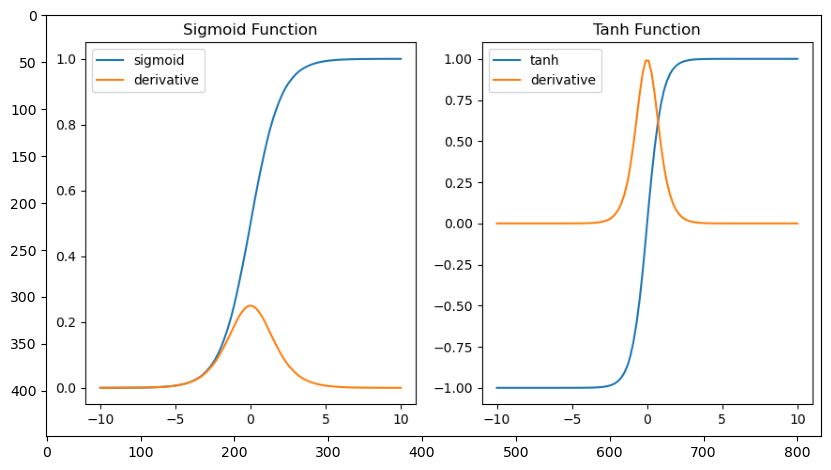

In [7]:
# plot thte image
img = mpimg.imread('functions.png')
plt.figure(figsize=(10,10))

imgplot = plt.imshow(img)

## Exercice 7

In [8]:
param_grid = {
    'batch_size': [32, 64, 128],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'alpha': [0.0001, 0.001, 0.01]
}

X = df.drop(columns=['target'])
y = df['target']

# split the data with 80% in training and 20% in testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create an MLPRegressor model
model = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=0, max_iter=3000)

# Scoring Function
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring = scorer)

# Fit the model to your data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=3000,
                                    random_state=0),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'batch_size': [32, 64, 128],
                         'learning_rate_init': [0.001, 0.01, 0.1]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False, response_method='predict'))

The best combination of hyperparaeters is the following: {'Alpha' = 0.01, 'Learning Rate' = 0.001, 'Batch Size' = 32}

Melhores Hiperparâmetros: {'alpha': 0.01, 'batch_size': 32, 'learning_rate_init': 0.001}
Melhor MAE: 4.484


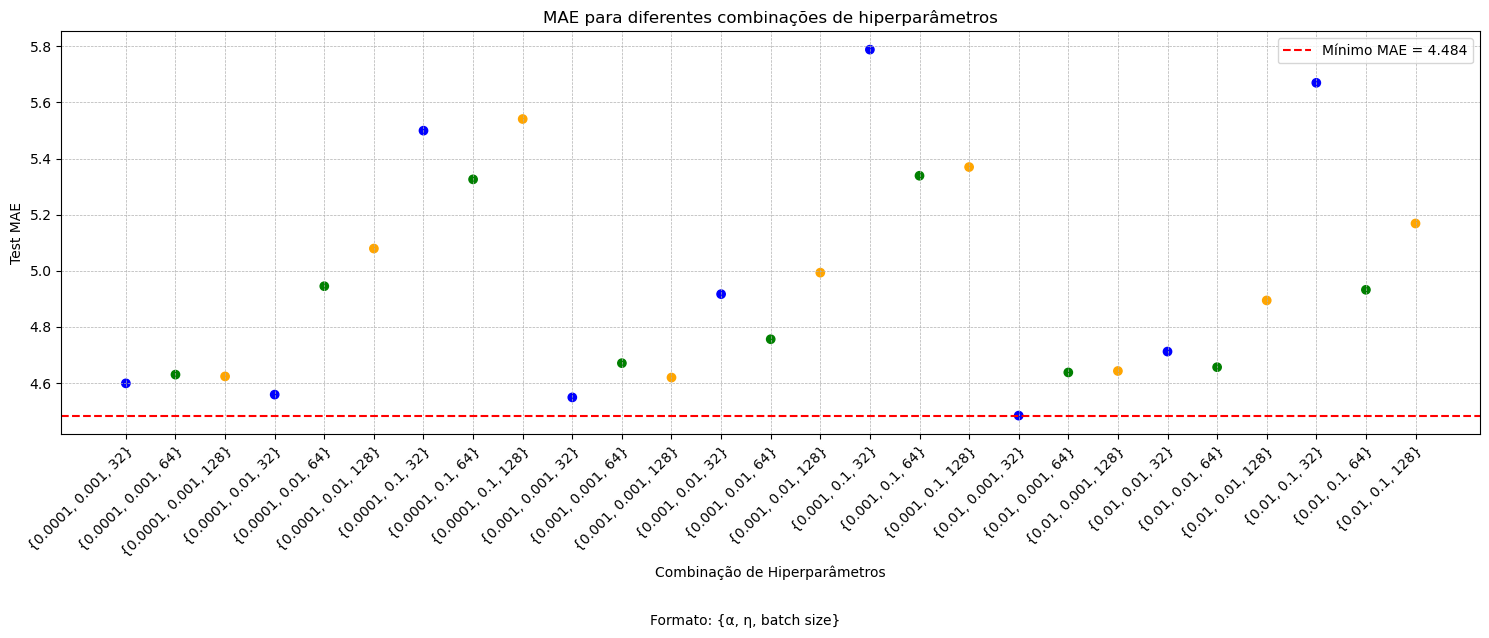

In [10]:
# Gerar uma lista de combinações dos hiperparâmetros como strings simplificadas
combinacoes_simplificadas = []
maes = []
cores = []
results = pd.DataFrame(grid_search.cv_results_)
for alpha in param_grid['alpha']:
    for learning_rate in param_grid['learning_rate_init']:
        for batch_size in param_grid['batch_size']:
            combinacoes_simplificadas.append(f'{{{alpha}, {learning_rate}, {batch_size}}}')
            subset = results[(results['param_batch_size'] == batch_size) & 
                             (results['param_alpha'] == alpha) & 
                             (results['param_learning_rate_init'] == learning_rate)]
            maes.append(-subset['mean_test_score'].values[0])
            # Atribui cores com base no batch_size (ou qualquer outro parâmetro)
            if batch_size == 32:
                cores.append('blue')
            elif batch_size == 64:
                cores.append('green')
            elif batch_size == 128:
                cores.append('orange')

# Criar o gráfico
fig, ax = plt.subplots(figsize=(15, 6))

# Plota os pontos, colorindo-os de acordo com o batch_size
scatter = ax.scatter(range(len(combinacoes_simplificadas)), maes, color=cores)

# Ajusta os ticks para mostrar as combinações de hiperparâmetros (simplificadas)
ax.set_xticks(range(len(combinacoes_simplificadas)))
ax.set_xticklabels(combinacoes_simplificadas, rotation=45, ha='right', rotation_mode='anchor')  # Ticks oblíquos

# Adicionar as linhas de grelha
ax.grid(True)  # Ativa a grelha para ambos os eixos
ax.grid(which='both', linestyle='--', linewidth=0.5)  # Customiza o estilo das linhas da grelha

# Ajusta os rótulos dos eixos
ax.set_xlabel('Combinação de Hiperparâmetros')
ax.set_ylabel('Test MAE')
ax.set_title('MAE para diferentes combinações de hiperparâmetros')

# Adicionar a legenda explicativa para a estrutura dos ticks
plt.figtext(0.5, -0.05, "Formato: {α, η, batch size}", ha="center", fontsize=10)

# Criar uma legenda para as cores (baseada no batch_size)
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Batch Size = 32', markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Batch Size = 64', markerfacecolor='green', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Batch Size = 128', markerfacecolor='orange', markersize=10)]
ax.legend(handles=legend_elements, title="Batch Size")

# Melhor combinação de hiperparâmetros
best_params = grid_search.best_params_
best_mae = -grid_search.best_score_  # Negativo porque no grid_search MAE é maximizado como negativo

# Imprimir os melhores hiperparâmetros e o MAE associado
print(f"Melhores Hiperparâmetros: {best_params}")
print(f"Melhor MAE: {best_mae:.3f}")

# Adicionar uma linha horizontal no gráfico no valor do melhor MAE
plt.axhline(y=best_mae, color='r', linestyle='--', label=f'Mínimo MAE = {best_mae:.3f}')

# Atualizar a legenda
plt.legend()

# Mostrar o gráfico
plt.tight_layout()
plt.show()

## Trade-offs of different parameters

Both large and low batch size values come with its own advantages and drawbacks. A low batch size makes it less computationally expensive and can prevent the model to overfit the training dataset. On the other hand, it might require more updates, which are based on less samples, this can lead to noisier updates. A large batch size, requires fewer but more accurate updates. If these updates get too accurate, the model might start to memorize the data in the training set.

A high learning rate in the first iterations might accelerate the gradient descent but in the long run it might make the model to take high steps which can lead to skipping global or local minimums. A low learning rate makes it slower to converge the loss function, however it avoids jumping over minimums.

L2 penalty is used to prevent overfitting. Usually it is use in problems with less complexity due to the higher risk of the model memorizing the training data.
For more demanding and complex tasks, we lower the Ridge regularization and let the model learn on its own. This approach comes with its own risk of potentially not being able to generalize well due to overfitting.

In [17]:
# Extract hyperparameter values and MAE scores from the GridSearchCV results
results = grid_search.cv_results_

# Get the parameter values from the GridSearchCV results
batch_sizes = np.array(results['param_batch_size'].data, dtype=float)
learning_rates = np.array(results['param_learning_rate_init'].data, dtype=float)
alphas = np.array(results['param_alpha'].data, dtype=float)

# Extract the mean test score (negative MAE in this case, so we negate it to get MAE)
mae_scores = -results['mean_test_score']

# Create a 3D scatter plot with Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=alphas,
    y=learning_rates,
    z=batch_sizes,
    mode='markers',
    marker=dict(
        size=8,
        color=mae_scores,  # Color represents MAE scores
        colorscale='Viridis',  # Use a continuous color scale
        colorbar=dict(title='MAE Score'),
        showscale=True
    )
)])

# Set axis labels
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Alpha (L2 Penalty)', type='log'),  # Log scale for Alpha
        yaxis=dict(title='Learning Rate Init', type='log'),  # Log scale for Learning Rate
        zaxis=dict(title='Batch Size', type='log')  # Log scale for Batch Size
    ),
    title="GridSearchCV Results: MAE vs Hyperparameters"
)

# Show the plot
fig.show()

The graphic tells that the __learning rate__ makes a __major difference__ in performance, as for __L2 penalty__ and __batch size__, it had __minimal impact__ on performance. The gradient of the model is stable enough to perform well accross different batch sizes and in respect to the L2 penalty, either the model is learning without overfitting or the range of values is not wide enough to change the performance on the MAE score.

The model seems sensitive to high learning rates, which may indicate that the gradient is somewhat noisy, causing the model to overshoot the minima.